In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# import the package tensorflow and keras to implement artificial neural network
import tensorflow as tf
from tensorflow import keras
print('tf version: ' + str(tf.__version__))
print('keras version: ' + str(keras.__version__))

tf version: 2.0.0
keras version: 2.2.4-tf


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [4]:
# N.B. 
'''
1 tBodyAcc-mean()-X
2 tBodyAcc-mean()-Y
3 tBodyAcc-mean()-Z

121 tBodyGyro-mean()-X
122 tBodyGyro-mean()-Y
123 tBodyGyro-mean()-Z
'''

df_features = pd.read_csv('/home/giacomo/Documenti/Doc_Uni_new/Sistemi_context_aware/Progetto/External_dataset/dataset_prof/UCI HAR Dataset/train/X_train.txt', header= None, sep= '\s+', usecols=[0, 1, 2, 120, 121, 122])#, on_bad_lines='skip')
df_features.iloc[:3,:]


,0,1,2,120,121,122
0,0.288585,-0.020294,-0.132905,-0.006101,-0.031365,0.107725
1,0.278419,-0.016411,-0.123520,-0.016112,-0.083894,0.100584
2,0.279653,-0.019467,-0.113462,-0.031698,-0.102335,0.096127


In [5]:
df_label = pd.read_csv('/home/giacomo/Documenti/Doc_Uni_new/Sistemi_context_aware/Progetto/External_dataset/dataset_prof/UCI HAR Dataset/train/y_train.txt', header= None, sep= '\s+')#, on_bad_lines='skip')
df_label.shape

(7352, 1)

In [6]:
df_label

,0
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [7]:
df_label = df_label.subtract(1, axis =1)
df_label

,0
0,4
1,4
2,4
3,4
4,4
...,...
7347,1
7348,1
7349,1
7350,1


In [8]:
print(df_label[0].unique())

[4 3 5 0 2 1]


In [9]:
df_features.columns = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z']
df_features

,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z
0,0.288585,-0.020294,-0.132905,-0.006101,-0.031365,0.107725
1,0.278419,-0.016411,-0.123520,-0.016112,-0.083894,0.100584
2,0.279653,-0.019467,-0.113462,-0.031698,-0.102335,0.096127
3,0.279174,-0.026201,-0.123283,-0.043410,-0.091386,0.085538
4,0.276629,-0.016570,-0.115362,-0.033960,-0.074708,0.077392
...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.035024,-0.093011,0.124412
7348,0.273853,-0.007749,-0.147468,0.118696,-0.095746,0.033277
7349,0.273387,-0.017011,-0.045022,-0.213192,0.039321,0.197982
7350,0.289654,-0.018843,-0.158281,-0.406205,0.068797,0.177467


In [10]:
# check NaN values
print(df_features.isnull().values.any(), df_label.isnull().values.any())

False False


In [11]:
# split train and test set
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, test_size=0.20, random_state=10)

In [12]:
print(type(X_train), type(y_train), X_train.shape, X_test.shape, y_train.shape, y_test.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> (5881, 6) (1471, 6) (5881, 1) (1471, 1)


In [13]:
X_train

,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z
333,0.222593,-0.024496,-0.153886,-0.316345,0.133484,0.178388
247,0.208964,-0.022743,-0.166449,-0.072932,-0.081659,0.117818
2793,0.274996,-0.017947,-0.113500,-0.028075,-0.071442,0.087241
5784,0.292406,0.009810,-0.101177,0.401727,-0.191602,0.114223
1628,0.277473,-0.004650,-0.090629,-0.030979,-0.082568,0.092314
...,...,...,...,...,...,...
3441,0.277831,-0.016453,-0.109082,-0.027316,-0.078491,0.086561
1344,0.265850,-0.035555,-0.156516,-0.004254,-0.184421,0.114037
4623,0.337784,-0.011351,-0.122571,-0.033599,-0.069951,0.069099
7293,0.270378,-0.026488,-0.061389,0.034448,-0.070005,0.051341


In [14]:
y_train

,0
333,2
247,5
2793,5
5784,0
1628,4
...,...
3441,4
1344,3
4623,5
7293,0


In [15]:
# create numpy array
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

print(type(X_train_np), type(y_train_np), X_train.shape, X_test.shape, y_train.shape, y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> (5881, 6) (1471, 6) (5881, 1) (1471, 1)


In [16]:
# importing random forest classifier from ensemble module
from sklearn.ensemble import RandomForestClassifier

In [17]:
# creating a RF classifier for comparison
clf = RandomForestClassifier(n_estimators = 100)

In [18]:
# Training the model on the training dataset
clf.fit(X_train_np, y_train.values.ravel())
  
# performing classification on the test dataset
y_class = clf.predict(X_test_np)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_np, y_class))

ACCURACY OF THE MODEL:  0.6424201223657376


In [19]:
# Implementing feedforward neural networks with Keras and TensorFlow
# define the 64-64-6 architecture using Keras

modelFF = Sequential()

modelFF.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

modelFF.add(Dense(64, activation='relu'))

modelFF.add(Dense(6, activation='softmax'))

In [20]:
# Compile the model

from keras.optimizers import RMSprop, Adam

modelFF.compile(optimizer = keras.optimizers.Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Using TensorFlow backend.


In [21]:
print(modelFF.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 4,998
Trainable params: 4,998
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
# train the model

history = modelFF.fit(X_train_np, y_train.values.ravel(), epochs = 500, batch_size = 1, validation_split= 0.15)

Train on 4998 samples, validate on 883 samples
Epoch 1/500
4998/4998 [==============================] - 12s 2ms/sample - loss: 1.4300 - accuracy: 0.3583 - val_loss: 1.3624 - val_accuracy: 0.3839
Epoch 2/500
4998/4998 [==============================] - 12s 2ms/sample - loss: 1.2762 - accuracy: 0.4154 - val_loss: 1.2515 - val_accuracy: 0.4179
Epoch 3/500
4998/4998 [==============================] - 12s 2ms/sample - loss: 1.2202 - accuracy: 0.4474 - val_loss: 1.2122 - val_accuracy: 0.4519
Epoch 4/500
4998/4998 [==============================] - 12s 2ms/sample - loss: 1.1816 - accuracy: 0.4578 - val_loss: 1.2079 - val_accuracy: 0.4224
Epoch 5/500
4998/4998 [==============================] - 12s 2ms/sample - loss: 1.1566 - accuracy: 0.4712 - val_loss: 1.1669 - val_accuracy: 0.4564
Epoch 6/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 1.1309 - accuracy: 0.4768 - val_loss: 1.1814 - val_accuracy: 0.4655
Epoch 7/500
4998/4998 [==============================] - 13s 3ms/

Epoch 56/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.7920 - accuracy: 0.6531 - val_loss: 1.0036 - val_accuracy: 0.5923
Epoch 57/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.7827 - accuracy: 0.6573 - val_loss: 1.0363 - val_accuracy: 0.5878
Epoch 58/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.7854 - accuracy: 0.6637 - val_loss: 1.0557 - val_accuracy: 0.5651
Epoch 59/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.7787 - accuracy: 0.6589 - val_loss: 1.0946 - val_accuracy: 0.5776
Epoch 60/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.7799 - accuracy: 0.6673 - val_loss: 1.0941 - val_accuracy: 0.5459
Epoch 61/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.7790 - accuracy: 0.6655 - val_loss: 1.0731 - val_accuracy: 0.5832
Epoch 62/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.7762 - accuracy: 0.6671

Epoch 111/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.6778 - accuracy: 0.7073 - val_loss: 1.1941 - val_accuracy: 0.5708
Epoch 112/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.6698 - accuracy: 0.7099 - val_loss: 1.2161 - val_accuracy: 0.5663
Epoch 113/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.6754 - accuracy: 0.7075 - val_loss: 1.1539 - val_accuracy: 0.5912
Epoch 114/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.6741 - accuracy: 0.7083 - val_loss: 1.1763 - val_accuracy: 0.6059
Epoch 115/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.6719 - accuracy: 0.7107 - val_loss: 1.1804 - val_accuracy: 0.5629
Epoch 116/500
4998/4998 [==============================] - 10s 2ms/sample - loss: 0.6666 - accuracy: 0.7199 - val_loss: 1.1313 - val_accuracy: 0.5980
Epoch 117/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.6684 - accuracy:

Epoch 220/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.5572 - accuracy: 0.7599 - val_loss: 1.6458 - val_accuracy: 0.6014
Epoch 221/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.5505 - accuracy: 0.7675 - val_loss: 1.6551 - val_accuracy: 0.5787
Epoch 222/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.5597 - accuracy: 0.7535 - val_loss: 1.6870 - val_accuracy: 0.5855
Epoch 223/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.5548 - accuracy: 0.7607 - val_loss: 1.6224 - val_accuracy: 0.5866
Epoch 224/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.5511 - accuracy: 0.7657 - val_loss: 1.6906 - val_accuracy: 0.6036
Epoch 225/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.5449 - accuracy: 0.7665 - val_loss: 1.6392 - val_accuracy: 0.5980
Epoch 226/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.5547 - accuracy:

Epoch 329/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.4885 - accuracy: 0.7915 - val_loss: 2.2610 - val_accuracy: 0.6002
Epoch 330/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.4944 - accuracy: 0.7931 - val_loss: 2.3366 - val_accuracy: 0.5980
Epoch 331/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.4796 - accuracy: 0.7987 - val_loss: 2.3954 - val_accuracy: 0.5742
Epoch 332/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.4915 - accuracy: 0.7897 - val_loss: 2.2645 - val_accuracy: 0.5844
Epoch 333/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.4795 - accuracy: 0.7933 - val_loss: 2.4256 - val_accuracy: 0.5696
Epoch 334/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.4884 - accuracy: 0.7933 - val_loss: 2.2736 - val_accuracy: 0.5855
Epoch 335/500
4998/4998 [==============================] - 10s 2ms/sample - loss: 0.4811 - accuracy:

Epoch 438/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.4357 - accuracy: 0.8121 - val_loss: 2.8156 - val_accuracy: 0.6025
Epoch 439/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.4506 - accuracy: 0.8125 - val_loss: 2.8250 - val_accuracy: 0.5787
Epoch 440/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.4401 - accuracy: 0.8093 - val_loss: 2.8683 - val_accuracy: 0.5968
Epoch 441/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.4468 - accuracy: 0.8141 - val_loss: 2.9810 - val_accuracy: 0.5764
Epoch 442/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.4507 - accuracy: 0.8051 - val_loss: 3.0111 - val_accuracy: 0.5821
Epoch 443/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.4353 - accuracy: 0.8125 - val_loss: 2.9552 - val_accuracy: 0.5923
Epoch 444/500
4998/4998 [==============================] - 11s 2ms/sample - loss: 0.4542 - accuracy:

In [60]:
# save the model, old version h5
modelFF.save("modelli_salvati/UCI_FeedForward20220519.h5")

In [61]:
# save the model, new
modelFF.save("modelli_salvati/UCI_FeedForward20220519")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: modelli_salvati/UCI_FeedForward20220519/assets


In [34]:
# is possible to load the model previously saved

# modelFF = keras.models.load_model("modelli_salvati/UCI_FeedForward20220310.h5")

In [62]:
# Size of tensorflow's standard model

import os
standard_model_size = os.path.getsize("modelli_salvati/UCI_FeedForward20220519.h5")
print("tensorflow standard model is %d bytes" % standard_model_size)

tensorflow standard model is 92616 bytes


In [63]:
# Parameters

history.params

{'batch_size': 1,
 'epochs': 500,
 'steps': 4998,
 'samples': 4998,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

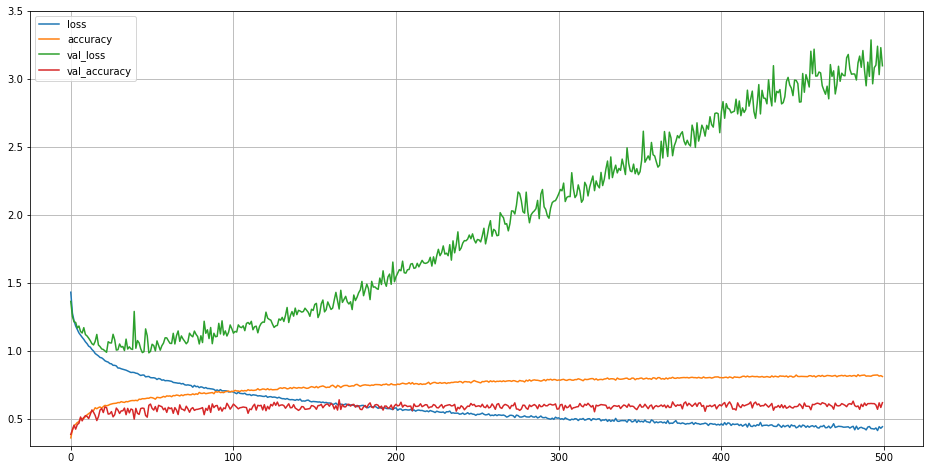

In [65]:
# plot the learning curves

pd.DataFrame(history.history).plot(figsize=(16, 8))
plt.grid(True)
plt.gca().set_ylim(0.3, 3.5)
plt.show()

In [66]:
# Convert the trainee model to the tensorflow lite format without quantization

# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(modelFF)
tflite_model = converter.convert()

# Save the model to disk (path: tflite_model)
open("tflite_model/UCI_FeedForward20220519.tflite", "wb").write(tflite_model)
  
# Size of tflite model
import os
basic_tflite_model_size = os.path.getsize("tflite_model/UCI_FeedForward20220519.tflite")
print("tensorflowlite standard model is %d bytes" % basic_tflite_model_size)

tensorflowlite standard model is 21612 bytes


In [67]:
# model quantization

import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model("/home/giacomo/Documenti/Doc_Uni_new/Sistemi_context_aware/Progetto/Jupyter_notebook/modelli_salvati/UCI_FeedForward20220519")

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

tflite_quant_model = converter.convert()

In [68]:
# Size of tflite quantized model

# Save the model to disk
open("tflite_model/FeedForward20220519_quantized.tflite", "wb").write(tflite_quant_model)
  
#import os
quantized_model_size = os.path.getsize("tflite_model/FeedForward20220519_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)

Quantized model is 12760 bytes


In [69]:
# Standard model: modelFF
# Base tflite model: tflite_model
# Quantized model: tflite_quant_model

import sklearn.metrics

# Prediction
result_standard_model = modelFF.predict(X_test_np)

result_standard_model[:5,:]

array([[1.1235308e-03, 5.5949849e-01, 4.3937793e-01, 6.6254388e-28,
        3.5805412e-29, 3.1874924e-36],
       [8.7221932e-01, 1.0221389e-03, 5.7596644e-05, 1.3402172e-08,
        5.1729421e-06, 1.2669571e-01],
       [1.2445904e-10, 4.9642044e-01, 5.0357956e-01, 3.0361418e-21,
        2.5524449e-24, 2.7017088e-21],
       [6.0859069e-02, 9.3823111e-01, 5.6965686e-08, 2.9115779e-07,
        9.0892642e-04, 4.2470165e-07],
       [1.9224045e-03, 1.8742388e-09, 8.0978742e-07, 3.0034164e-01,
        6.6047883e-01, 3.7256353e-02]], dtype=float32)

In [70]:
print(y_test.iloc[:10,:])

      0
1729  2
4324  0
5457  1
85    0
5960  5
3311  3
3052  4
3710  5
288   0
778   0


In [71]:
# for each row select the classes with the highest probability

y_result = np.argmax(result_standard_model, axis=1)

In [72]:
y_result[:10]

array([1, 0, 2, 1, 4, 4, 5, 5, 1, 0])

In [73]:
# Compute the accuracy

accuracy = sklearn.metrics.accuracy_score(y_test_np, y_result)

print("Accuracy standard tf model: ", accuracy)

Accuracy standard tf model:  0.6363018354860639


In [74]:
# Confusion Matrix

confmatrix = sklearn.metrics.confusion_matrix(y_test_np, y_result)
print(confmatrix)

[[132  31  20   9  20  14]
 [ 25 136  49   1   7   7]
 [ 39  41 121   1   5   6]
 [  5   2   3 175  35  50]
 [ 16   3   1  59 160  23]
 [  8   8   1  28  18 212]]


In [75]:
# Prediction using tflite: 

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [76]:
# Get input and output tensors.

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [77]:
print(input_details)

[{'name': 'dense_12_input', 'index': 1, 'shape': array([1, 6], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]


In [78]:
input_details[0]

{'name': 'dense_12_input',
 'index': 1,
 'shape': array([1, 6], dtype=int32),
 'dtype': numpy.float32,
 'quantization': (0.0, 0)}

In [79]:
# change the dtype to 'float32'

X_test_np_32 = X_test_np.astype('float32')
X_test_np_32.dtype

dtype('float32')

In [80]:
X_test_np_32[0]

array([ 0.3201558 , -0.02365911, -0.0636547 ,  0.35397047, -0.25719276,
        0.06729465], dtype=float32)

In [81]:
output_details

[{'name': 'Identity',
  'index': 0,
  'shape': array([1, 6], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

In [82]:
size = X_test_np_32.shape[0]
size

1471

In [83]:
# Array used for tflite model classes prediction

result_tflite = []
result_tflite

[]

In [84]:
# prediction's loop

for i in range (size) :
    value_reshaped = X_test_np_32[i].reshape(1,6)
    interpreter.set_tensor(input_details[0]['index'], value_reshaped)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    result_tflite = np.append(result_tflite, np.argmax(output_data, axis=1))

    
print(output_data)
print(result_tflite.dtype)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 9.7487305e-07 0.0000000e+00
  9.9999905e-01]]
float64


In [85]:
result_tflite[:10]

array([1., 0., 2., 1., 4., 4., 5., 5., 1., 0.])

In [86]:
# Compute accuracy of TFlite model

acc_tflite = sklearn.metrics.accuracy_score(y_test, result_tflite)
print("Accuracy tflite model: ", acc_tflite)

Accuracy tflite model:  0.6363018354860639


In [87]:
confmatrix_tflite_model = sklearn.metrics.confusion_matrix(y_test, result_tflite)
print(confmatrix_tflite_model)

[[132  31  20   9  20  14]
 [ 25 136  49   1   7   7]
 [ 39  41 121   1   5   6]
 [  5   2   3 175  35  50]
 [ 16   3   1  59 160  23]
 [  8   8   1  28  18 212]]


In [88]:
## prediction using the quantized model
## tflite_quant_model

# Load the TFLite model and allocate tensors.
interpreter_q = tf.lite.Interpreter(model_content=tflite_quant_model)
interpreter_q.allocate_tensors()

In [89]:
# Get input and output tensors for .

input_details = interpreter_q.get_input_details()
output_details = interpreter_q.get_output_details()

In [90]:
input_details[0]

{'name': 'dense_12_input',
 'index': 10,
 'shape': array([1, 6], dtype=int32),
 'dtype': numpy.float32,
 'quantization': (0.0, 0)}

In [91]:
# Array with tflite model classes prediction

result_quant_tflite = []

In [92]:
for i in range (size) :
    value_reshaped = X_test_np_32[i].reshape(1,6)
    interpreter_q.set_tensor(input_details[0]['index'], value_reshaped)
    interpreter_q.invoke()
    output_data = interpreter_q.get_tensor(output_details[0]['index'])
    result_quant_tflite = np.append(result_quant_tflite, np.argmax(output_data, axis=1))
    
print(output_data)
print(result_quant_tflite.dtype)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.1776898e-06 0.0000000e+00
  9.9999881e-01]]
float64


In [93]:
# Compute accuracy of TFlite quantized model

import sklearn.metrics

acc_quant_tflite = sklearn.metrics.accuracy_score(y_test, result_quant_tflite)
print("Accuracy tflite quant model: ", acc_quant_tflite)

Accuracy tflite quant model:  0.6356220258327668


In [94]:
confmatrix_quant_tflite_model = sklearn.metrics.confusion_matrix(y_test, result_quant_tflite)
print(confmatrix_quant_tflite_model)

[[131  30  22   9  20  14]
 [ 25 136  49   1   7   7]
 [ 39  41 121   1   5   6]
 [  5   2   3 175  35  50]
 [ 17   3   0  58 160  24]
 [  7   8   1  29  18 212]]


In [95]:
# Accuracies recap:

# tf model
#accuracy = sklearn.metrics.accuracy_score(y_test, result_standard_model)
print("Accuracy standard tf model: ", '\t', accuracy)

# tf lite model
#acc_tflite = sklearn.metrics.accuracy_score(y_test, result_tflite)
print("Accuracy tflite model: ",  '\t', acc_tflite)

# tf lite quant model
#acc_quant_tflite = sklearn.metrics.accuracy_score(y_test, result_quant_tflite)
print("Accuracy tflite quant model: ", '\t',  acc_quant_tflite)


Accuracy standard tf model:  	 0.6363018354860639
Accuracy tflite model:  	 0.6363018354860639
Accuracy tflite quant model:  	 0.6356220258327668


In [96]:
# Recap model's dimensions :

print("tensorflow standard model is %d bytes" % standard_model_size)
print("tensorflowlite standard model is %d bytes" % basic_tflite_model_size)
print("tensorflowlite Quantized model is %d bytes" % quantized_model_size)

tensorflow standard model is 92616 bytes
tensorflowlite standard model is 21612 bytes
tensorflowlite Quantized model is 12760 bytes
